# 线性回归模型中使用梯度下降法


输入数据，迭代计算，到一定次数，`theta`就不变了

找到最小值了，找到最低点

最小值不是0，没有必要做无谓的挣扎

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 不是随机生成，具有可重复性
np.random.seed(666)
x = 2*np.random.random(size=100)
y = x*3 + 4 + np.random.normal(size=100)

In [4]:
X = x.reshape(-1, 1) # -1 代表任意

In [5]:
X[:5]

array([[1.40087424],
       [1.68837329],
       [1.35302867],
       [1.45571611],
       [1.90291591]])

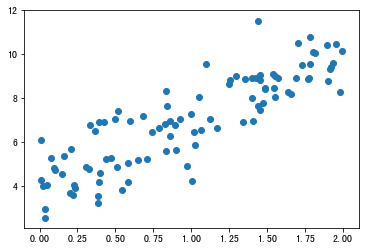

In [6]:
plt.scatter(X, y)

## 使用梯度下降法训练
![](images/01.png)

#### 求偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### 向量化的偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

In [7]:
# 损失函数
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [8]:
# 梯度计算
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y) # 第0个参数
    
    for i in range(1, len(theta)):
        # 每一个样本取出 对应特征 对应的列
        res[i] = np.sum((X_b.dot(theta) -y).dot(X_b[:, i]))
        
    return res * 2 / len(X_b)

In [9]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e3 ,epsilon=1e-8):
    
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient # 向导数的负方向移1步
    
        # 是不是最小值的点，导数等于0 的点 --- 可能永远达不到这个精度
        # 每一次损失函数都要小一点
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        
        i_iter += 1
        
    return theta

In [11]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)]) # 变成列向量
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [16]:
X_b[:5]

array([[1.        , 1.40087424],
       [1.        , 1.68837329],
       [1.        , 1.35302867],
       [1.        , 1.45571611],
       [1.        , 1.90291591]])

In [17]:
y[:5]

array([8.91412688, 8.89446981, 8.85921604, 9.04490343, 8.75831915])

In [12]:
initial_theta

array([0., 0.])

In [13]:
# 就是我们要计算的 b w
# 截距 斜率
# 找到最低点，我的theta就不变了
# 此时的theta=[b, w]决定的直线，与原始数据误差最小！！
theta 

array([3.99481236, 3.02953666])

<br><br>

## 封装自己的线性回归算法
参见 [代码](playML/LinearRegression.py)

In [14]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [15]:
lin_reg._theta

array([4.02145786, 3.00706277])

In [16]:
# 系数
lin_reg.coef_

array([3.00706277])

In [17]:
# 系数
lin_reg.intercept_

4.021457858204859

In [18]:
lin_reg2 = LinearRegression()
lin_reg2.fit_normal(X, y)

LinearRegression()

In [19]:
lin_reg2.coef_

array([3.00517447])

In [20]:
lin_reg2.intercept_

4.023696672103897

<br><br>

## 梯度下降法向量化提速

以前要for循环

形同形式，矩阵之间的乘法
![](images/02.png)

- 算法表示都是列向量
- numpy中向量不区分行、列向量的（没有列向量），基本都是1维向量
- 数学表示上，都是列向量，转置变成行向量！

In [ ]:
def dJ(theta, X_b, y):
    # res = np.empty(len(theta))
    # res[0] = np.sum(X_b.dot(theta) - y)
    # for i in range(1, len(theta)):
    #     res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    # return res * 2 / len(X_b)
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)